In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Building an Image Classifier
First Let's install and import TensorFlow and Keras
* conda install tensorflow
* conda install pip
* pip install --upgrade tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.14.0


In [4]:
keras.__name__

'keras.api._v2.keras'

## Load dataset

In [5]:
fashion = keras.datasets.fashion_mnist
(x_train_full, y_train_full),(x_test, y_test) = fashion.load_data()

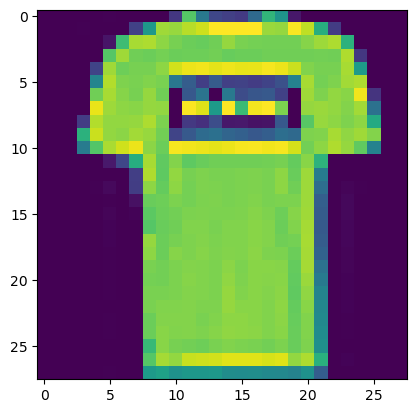

In [6]:
plt.imshow(x_train_full[1])
plt.show()

$$
\begin{aligned}
& \text {Fashion_minst dataset}\\
&\begin{array}{cccc}
\hline \hline \text { Label } & \text { Description }\\
\hline 0 & T-shirt/top  \\
1 & Trouser  \\
2 & Pullover \\
3 & Dress \\
4 & Coat \\
5 & Sandal\\
6 & Shirt\\
7 & Sneaker\\
8 & Bag\\
9 & Ankle Boot\\
\hline
\end{array}
\end{aligned}
$$

In [7]:
y_train_full[0]

9

In [8]:
class_names = ["T-shirt/top",'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

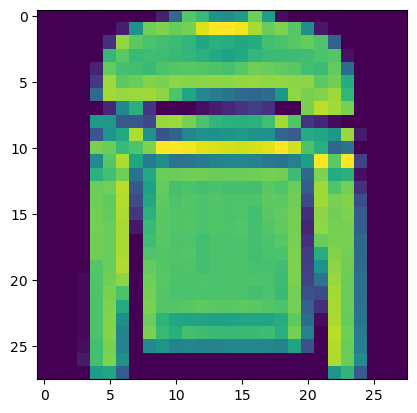

In [9]:
location = 5
plt.imshow(x_train_full[location])
plt.show()

In [10]:
class_names[y_train_full[location]]

'Pullover'

In [11]:
x_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

### Data Normalization
We then normalize the data dimensions so that they are of approximately teh same scale.

In [12]:
x_train_n =x_train_full / 255
x_test_n = x_test / 255

### Split the data into train/validation/test datasets

In [13]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

In [14]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Create the model Architecture
There are two APIs for defining a model in keras:
* Sequential model API
* Functional API

In [15]:
sorted([1,2,3])

[1, 2, 3]

In [16]:
def stone(string, strein):
    num = strein.split(" ")
    number = len(num)
    for letter in string:
        for n in num:
            if letter in n:
                number -= 1
                
    return number
        

In [17]:
stone("ad","hello world junior")

2

In [18]:
length = 5
arr = [3,4,5,1,2]
arr = sorted(arr)
print(arr)
print(range(1,length))
total_num = 0
for element in range(1,length+1):
    if element in arr:
        total_num += 1
    else:
        print(False)
    
if total_num == length:
    print(True)
else:
    print(False)


[1, 2, 3, 4, 5]
range(1, 5)
True


In [19]:
def solution(paths: list[list[str]]) -> str:
    for path in paths:
        if path[1] == (path+1)[0]:
            pass
        else:
            if paths[path][0] == paths[path[-1]]:
                return paths[path[-1]]
            return path[1]
        

In [20]:
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# pip install pydot

In [24]:
# keras.utils.plot_model(model)

In [25]:
weights, biases = model.layers[1].get_weights()

In [26]:
weights

array([[-0.06178052,  0.01864588, -0.05615758, ..., -0.05766867,
         0.03916186,  0.00838199],
       [ 0.03246783, -0.02547571,  0.01655494, ..., -0.06176232,
        -0.06874169, -0.04247953],
       [-0.07133688,  0.04974602,  0.01970186, ...,  0.00638508,
        -0.00345755, -0.03149051],
       ...,
       [-0.03871936, -0.05553304,  0.00867245, ..., -0.0298499 ,
         0.02652178,  0.02098881],
       [-0.06462713, -0.02686116,  0.03866988, ...,  0.02915915,
         0.04789118, -0.06921232],
       [ 0.07054687,  0.06508553,  0.06576717, ..., -0.03308349,
         0.01730499, -0.03091612]], dtype=float32)

In [27]:
weights.shape

(784, 300)

In [28]:
biases.shape

(300,)

In [29]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [30]:
model_history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 7ms/step - loss: 0.7317 - accuracy: 0.7572 - val_loss: 0.5251 - val_accuracy: 0.8218
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4892 - accuracy: 0.8290 - val_loss: 0.4362 - val_accuracy: 0.8496
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4427 - accuracy: 0.8435 - val_loss: 0.5340 - val_accuracy: 0.8032
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4160 - accuracy: 0.8543 - val_loss: 0.3927 - val_accuracy: 0.8658
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3976 - accuracy: 0.8609 - val_loss: 0.3786 - val_accuracy: 0.8662
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3786 - accuracy: 0.8665 - val_loss: 0.3734 - val_accuracy: 0.8704
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3656 - accuracy: 0.8711 - val_loss: 0.3609 - val_ac

In [31]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [32]:
model_history.history

{'loss': [0.7316736578941345,
  0.48916515707969666,
  0.4427040219306946,
  0.4160252511501312,
  0.39764338731765747,
  0.37859827280044556,
  0.36563363671302795,
  0.3542782664299011,
  0.3435017168521881,
  0.3340526521205902],
 'accuracy': [0.7571818232536316,
  0.8289636373519897,
  0.8434908986091614,
  0.8542545437812805,
  0.8608545660972595,
  0.866527259349823,
  0.8710908889770508,
  0.8741454482078552,
  0.8783454298973083,
  0.8806727528572083],
 'val_loss': [0.5251337885856628,
  0.4361651837825775,
  0.5340377688407898,
  0.3927028179168701,
  0.3785673975944519,
  0.37342900037765503,
  0.36094042658805847,
  0.39110565185546875,
  0.3553023636341095,
  0.3503303527832031],
 'val_accuracy': [0.8217999935150146,
  0.8496000170707703,
  0.8032000064849854,
  0.8658000230789185,
  0.8661999702453613,
  0.8704000115394592,
  0.8737999796867371,
  0.8565999865531921,
  0.8745999932289124,
  0.8737999796867371]}

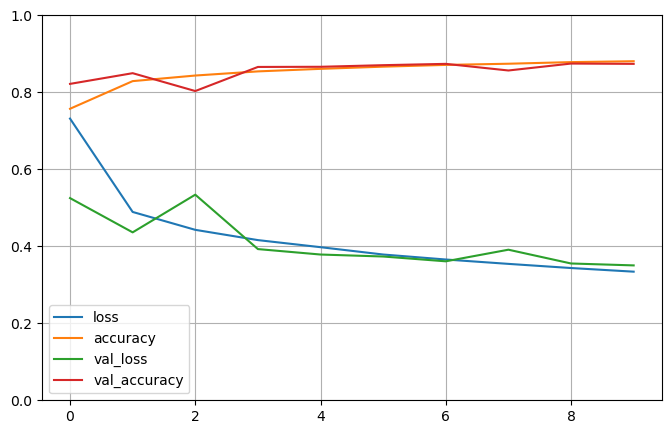

In [33]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [34]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3883 - accuracy: 0.8599


[0.3882826864719391, 0.8598999977111816]

In [35]:
x_new = x_test[:3]

In [36]:
y_proba = model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 249ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.05, 0.  , 0.89],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = model.predict(x_new)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[2.0880909e-05, 7.5659216e-07, 4.0727798e-05, 4.1361596e-05,
        1.0729615e-05, 5.8740031e-02, 4.2562213e-05, 5.0267309e-02,
        3.5310935e-03, 8.8730460e-01],
       [8.6627355e-05, 1.6907865e-07, 9.9428314e-01, 1.0858024e-06,
        8.0312736e-04, 8.5225077e-10, 4.8239622e-03, 8.4981550e-11,
        1.8173523e-06, 1.5381803e-10],
       [6.2474457e-05, 9.9991512e-01, 2.1822621e-06, 1.7164804e-05,
        2.4137294e-06, 3.4863998e-08, 3.5201489e-07, 2.1385963e-08,
        2.1200555e-07, 6.4737660e-09]], dtype=float32)

In [38]:
# np.array(class_names)[y_pred]

AxesImage(size=(28, 28))


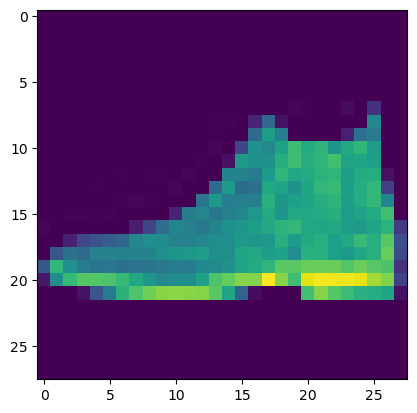

In [39]:
print(plt.imshow(x_test[0]))

AxesImage(size=(28, 28))


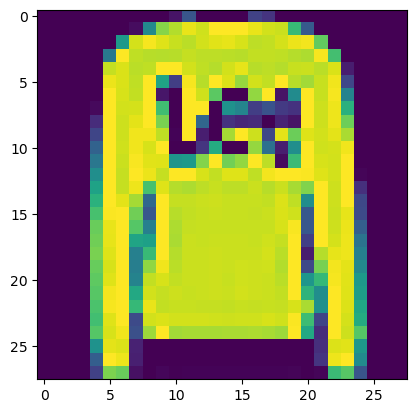

In [40]:
print(plt.imshow(x_test[1]))


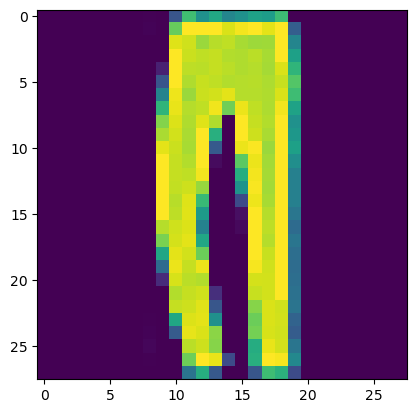

In [41]:
plt.imshow(x_test[2])
plt.show()

## Problem 2
* Build and train a regression model using keras

In [42]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### Dataset Characteristics
<b> Number of instances </b>
<br>
20640
<b>Number of attributes </b> <br>
* 8 Numeric, predictive attributes and the target
<b>Attribute Information</b>
* MedInc  median income in block
* HouseAge Median house age in block
* AveRooms average number of rooms
* Population block Population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude
<br>

<b>Target</b><br>
The target variable is the median house value in units of 100, 000 for California districts

In [43]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [44]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [45]:
# by default test size = 0.25
from sklearn.model_selection import train_test_split
x_train_full,x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

In [46]:
x_train.shape, x_valid.shape, x_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [47]:
y_train.shape, y_valid.shape, y_test.shape

((11610,), (3870,), (5160,))

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)


In [49]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
x_train.shape, x_valid.shape, x_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation= 'relu'),
    keras.layers.Dense(1)
])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                270       
                                                                 
 dense_5 (Dense)             (None, 30)                930       
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['mae'])

In [56]:
model_hist = model.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid))

Epoch 1/50
363/363 [==============================] - 2s 4ms/step - loss: 2.2473 - mae: 1.0988 - val_loss: 2.7125 - val_mae: 0.7418
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 0.8716 - mae: 0.7004 - val_loss: 1.4617 - val_mae: 0.6821
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.7742 - mae: 0.6618 - val_loss: 0.8925 - val_mae: 0.6372
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 0.7188 - mae: 0.6340 - val_loss: 0.7438 - val_mae: 0.6162
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.6799 - mae: 0.6129 - val_loss: 0.6395 - val_mae: 0.5881
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.6464 - mae: 0.5955 - val_loss: 0.6053 - val_mae: 0.5749
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.6188 - mae: 0.5800 - val_loss: 0.5753 - val_mae: 0.5590
Epoch 8/50
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [57]:
mae_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3707 - mae: 0.4313


In [59]:
model_hist.history

{'loss': [2.247250556945801,
  0.8715564012527466,
  0.7741782665252686,
  0.7187747359275818,
  0.6799395084381104,
  0.646409809589386,
  0.6187838315963745,
  0.5934493541717529,
  0.5704279541969299,
  0.5490479469299316,
  0.5294478535652161,
  0.5116816759109497,
  0.4957406520843506,
  0.4818430542945862,
  0.4700014889240265,
  0.4598586857318878,
  0.4512738287448883,
  0.44375425577163696,
  0.43682461977005005,
  0.4314022362232208,
  0.42607706785202026,
  0.42194515466690063,
  0.4180264472961426,
  0.41472548246383667,
  0.41155877709388733,
  0.4090578556060791,
  0.4068466126918793,
  0.4046502411365509,
  0.40265437960624695,
  0.40069136023521423,
  0.3985086679458618,
  0.3967842757701874,
  0.39563608169555664,
  0.3936689496040344,
  0.3920517861843109,
  0.3903994858264923,
  0.38884586095809937,
  0.3873307704925537,
  0.3856872618198395,
  0.38393840193748474,
  0.38246044516563416,
  0.38106241822242737,
  0.37904104590415955,
  0.3773755431175232,
  0.37604847

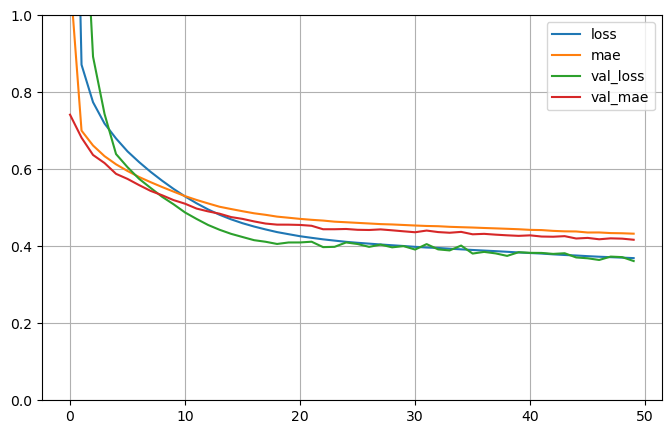

In [64]:
pd.DataFrame(model_hist.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1) # makes y axix starts from 0 as the minimum and ends as 1 as the maximum value...
plt.show()

In [66]:
x_new = x_test[:3]

In [67]:
y_pred = model.predict(x_new)
print(y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 156ms/step
[[0.67734647]
 [1.8792167 ]
 [3.8030787 ]]
[0.477   0.458   5.00001]
